In [1]:
import pandas as pd

In [2]:
df = pd.read_excel(r'F:\pk\01_Data_science\ASSIGNMENTS\07_clustering\EastWestAirlines.xlsx', sheet_name='data')

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
'''

#EDA with pandas profiling 
import pandas_profiling as pp
report = pp.ProfileReport(df, title='Airline report', explorative=True)
report.to_widgets()

'''

"\n\n#EDA with pandas profiling \nimport pandas_profiling as pp\nreport = pp.ProfileReport(df, title='Airline report', explorative=True)\nreport.to_widgets()\n\n"

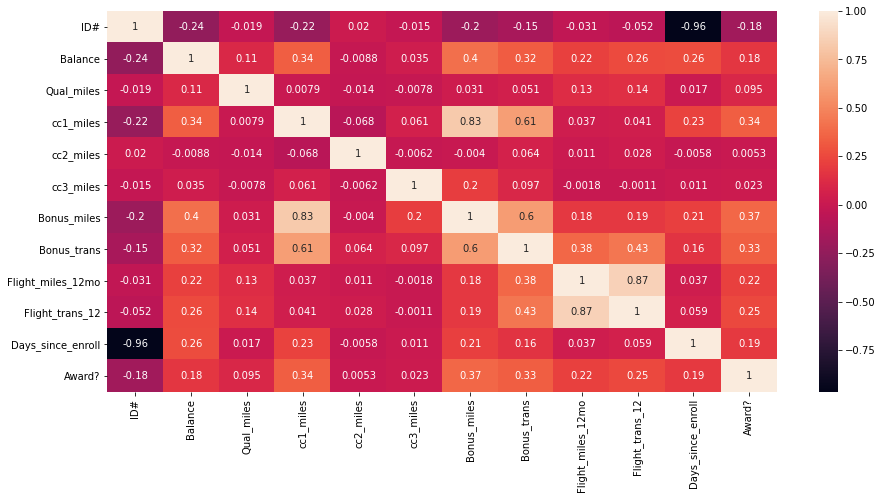

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

In [8]:
#drop columns ID and Days since enrol
df2=df.drop(columns=['ID#','Days_since_enroll'])

In [9]:
df2.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Award?'],
      dtype='object')

In [10]:
# Normalization of data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df=scaler.fit_transform(df2)

In [11]:
#import libraries for clustering

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

<function matplotlib.pyplot.show(*args, **kw)>

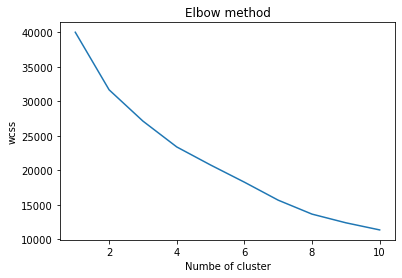

In [12]:
#finding optimum no. of cluster
#within cluster sum of square

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i , random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Numbe of cluster')
plt.ylabel('wcss')
plt.show

In [13]:
#No. of cluster to form 6
#subject to decisson 

In [14]:
#hierarchical clustering 


In [15]:
#creating dendrogram

'''
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,7))
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='average'))

'''

"\nimport matplotlib.pyplot as plt\nfig = plt.figure(figsize=(15,7))\ndendrogram = sch.dendrogram(sch.linkage(scaled_df, method='average'))\n\n"

In [16]:
hc = AgglomerativeClustering(n_clusters=6 , affinity="euclidean", linkage="single")
y_hc = hc.fit_predict(scaled_df)
clusters = pd.DataFrame(y_hc , columns=['H_clusters'])
df['H_clusters'] = hc.labels_
df2['H_clusters'] = hc.labels_

In [17]:
# Kmeans clustering

clusters_new = KMeans(6, random_state=40)
clusters_new.fit(scaled_df)

KMeans(n_clusters=6, random_state=40)

In [18]:
df['KMeans_cluster']=clusters_new.labels_
df2['KMeans_cluster']=clusters_new.labels_

In [19]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_clusters,KMeans_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,4


In [43]:
df.groupby(['KMeans_cluster']).count()

In [21]:
df.groupby(['H_clusters']).count()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_cluster
H_clusters,,,,,,,,,,,,,
0,3953,3953,3953,3953,3953,3953,3953,3953,3953,3953,3953,3953,3953
1,28,28,28,28,28,28,28,28,28,28,28,28,28
2,15,15,15,15,15,15,15,15,15,15,15,15,15
3,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1


In [29]:
df2.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Award?', 'H_clusters', 'KMeans_cluster'],
      dtype='object')

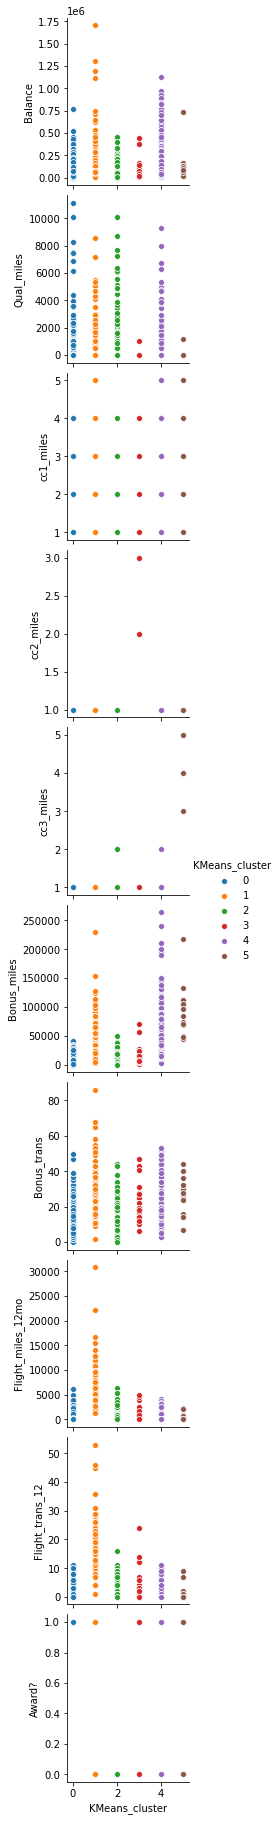

In [61]:
#fig = figer(figsize=(7,4))
sns.pairplot(df,
            y_vars=['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Award?'],
            x_vars=['KMeans_cluster'],
            hue='KMeans_cluster',
            kind='scatter'
            )

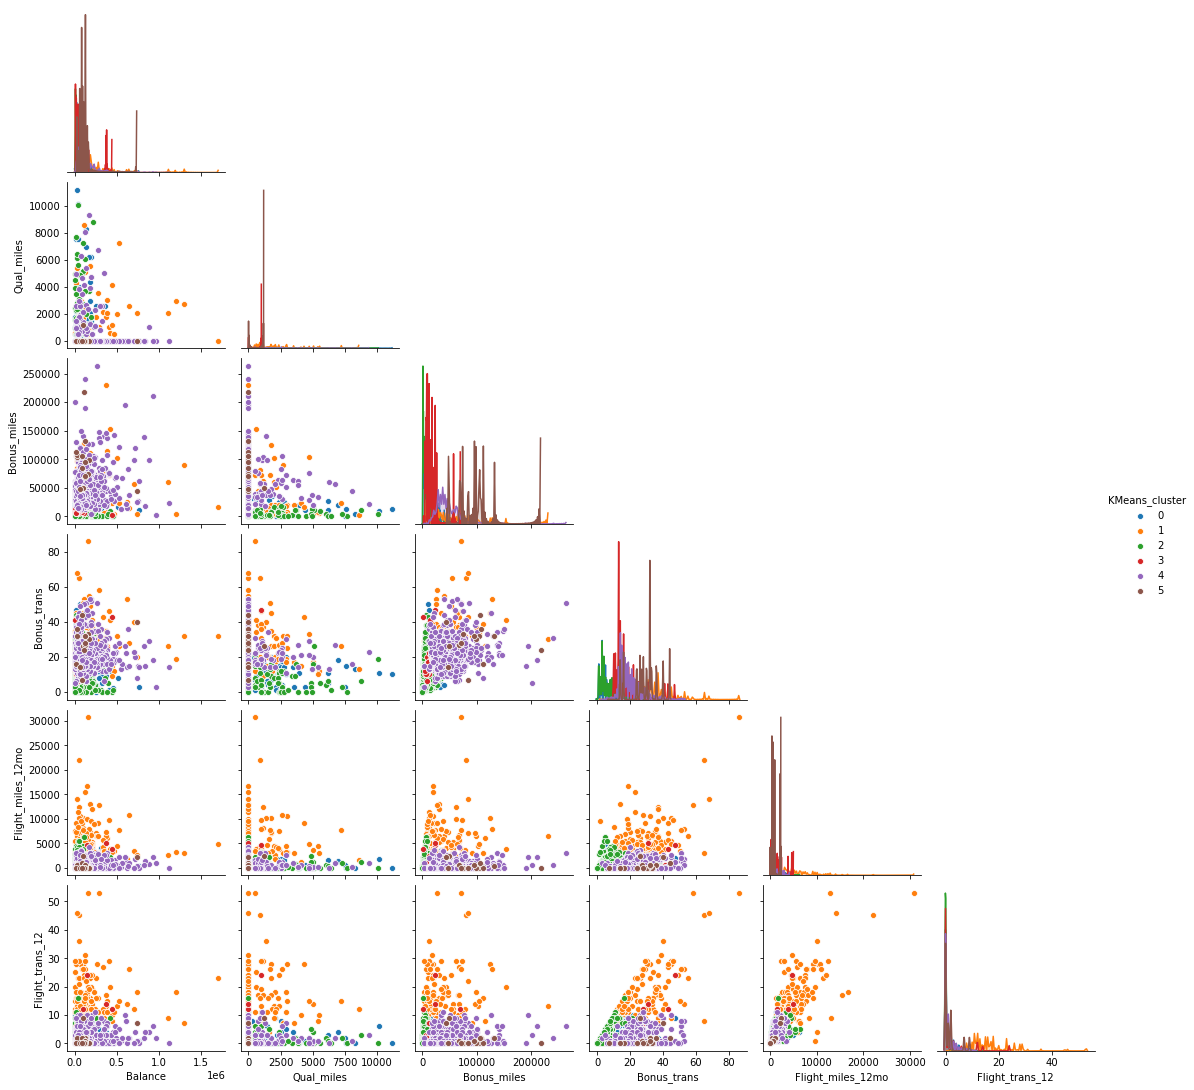

In [71]:
#RELAITON SHIP OF VARIALBLE WITH KMean CLUSTER

sns.pairplot(df,
            y_vars=['Balance', 'Qual_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12'],
            x_vars=['Balance', 'Qual_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12'],
            hue='KMeans_cluster',
            kind='scatter',
            diag_kws={'bw': 0.2},
            corner=True
            )

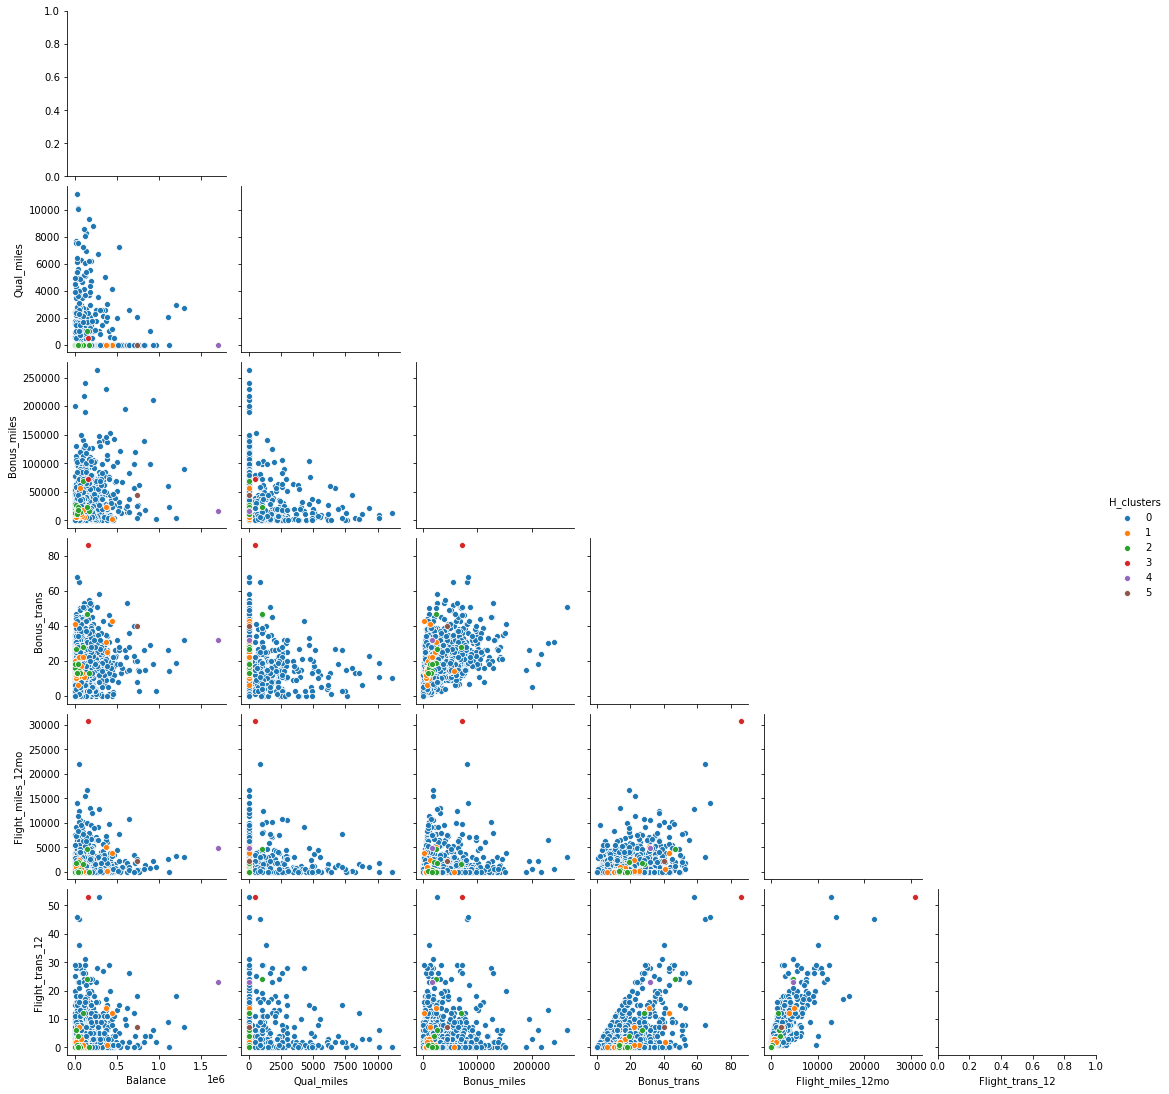

In [73]:
#RELAITON SHIP OF VARIALBLE WITH HIERARCHICAL CLUSTER

sns.pairplot(df,
            y_vars=['Balance', 'Qual_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12'],
            x_vars=['Balance', 'Qual_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12'],
            hue='H_clusters',
            kind='scatter',
            diag_kws={'bw': 0.2},
            diag_kind='scatter',
            corner=True
            )